In [1]:
import numpy as np

In [2]:
# Custom function for print a sentence
def goodPrint(a):
    x = ""
    for i in range(len(a)):
        x += a[i]+" "
    return x

## Downloading nltk corpus

In [3]:
import nltk
nltk.download('cess_esp')

[nltk_data] Downloading package cess_esp to /home/carban/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


True

In [4]:
from nltk.corpus import cess_esp

tagged_sentences = cess_esp.tagged_sents()

## We get a corpus with sentences and the tag for each word

In [5]:
print(tagged_sentences[0])
print("==========================")
print("Tagged sentences: ", len(tagged_sentences))
print("Tagged words:", len(cess_esp.tagged_words()))

[(u'El', u'da0ms0'), (u'grupo', u'ncms000'), (u'estatal', u'aq0cs0'), (u'Electricit\xe9_de_France', u'np00000'), (u'-Fpa-', u'Fpa'), (u'EDF', u'np00000'), (u'-Fpt-', u'Fpt'), (u'anunci\xf3', u'vmis3s0'), (u'hoy', u'rg'), (u',', u'Fc'), (u'jueves', u'W'), (u',', u'Fc'), (u'la', u'da0fs0'), (u'compra', u'ncfs000'), (u'del', u'spcms'), (u'51_por_ciento', u'Zp'), (u'de', u'sps00'), (u'la', u'da0fs0'), (u'empresa', u'ncfs000'), (u'mexicana', u'aq0fs0'), (u'Electricidad_\xc1guila_de_Altamira', u'np00000'), (u'-Fpa-', u'Fpa'), (u'EAA', u'np00000'), (u'-Fpt-', u'Fpt'), (u',', u'Fc'), (u'creada', u'aq0fsp'), (u'por', u'sps00'), (u'el', u'da0ms0'), (u'japon\xe9s', u'aq0ms0'), (u'Mitsubishi_Corporation', u'np00000'), (u'para', u'sps00'), (u'poner_en_marcha', u'vmn0000'), (u'una', u'di0fs0'), (u'central', u'ncfs000'), (u'de', u'sps00'), (u'gas', u'ncms000'), (u'de', u'sps00'), (u'495', u'Z'), (u'megavatios', u'ncmp000'), (u'.', u'Fp')]
('Tagged sentences: ', 6030)
('Tagged words:', 192685)


## Splitting Sentence and tag inside two different arrays, later write 2 files for the 2 arrays

In [6]:
import numpy as np
import pickle

sentences, tagss = [], []
for tagged_sentence in tagged_sentences:
    sentence, tags = zip(*tagged_sentence)
    sentences.append(np.array(sentence))
    tagss.append(np.array(tags))
    
# with open("sentences.txt", "wb") as fp:
#     pickle.dump(sentences, fp)
    
# with open("tags.txt", "wb") as fp:
#     pickle.dump(tagss, fp)

## Printing a sample of the arrays

In [7]:
print(str(len(sentences)) + "\n")
print("Words on the first sentence: "+str(len(sentences[0])))+"\n"
print(goodPrint(sentences[0])+ "\n")
print("tags of the first sentence: "+str(len(tagss[0])))+"\n"
print(tagss[0])

6030

Words on the first sentence: 40

El grupo estatal Electricité_de_France -Fpa- EDF -Fpt- anunció hoy , jueves , la compra del 51_por_ciento de la empresa mexicana Electricidad_Águila_de_Altamira -Fpa- EAA -Fpt- , creada por el japonés Mitsubishi_Corporation para poner_en_marcha una central de gas de 495 megavatios . 

tags of the first sentence: 40

[u'da0ms0' u'ncms000' u'aq0cs0' u'np00000' u'Fpa' u'np00000' u'Fpt'
 u'vmis3s0' u'rg' u'Fc' u'W' u'Fc' u'da0fs0' u'ncfs000' u'spcms' u'Zp'
 u'sps00' u'da0fs0' u'ncfs000' u'aq0fs0' u'np00000' u'Fpa' u'np00000'
 u'Fpt' u'Fc' u'aq0fsp' u'sps00' u'da0ms0' u'aq0ms0' u'np00000' u'sps00'
 u'vmn0000' u'di0fs0' u'ncfs000' u'sps00' u'ncms000' u'sps00' u'Z'
 u'ncmp000' u'Fp']


## Percentages for training and testing

In [8]:
from sklearn.model_selection import train_test_split
 
(training_sentences, 
 test_sentences, 
 training_tags, 
 test_tags) = train_test_split(sentences, tagss, test_size=0.2)

(train_sentences, 
 eval_sentences, 
 train_tags, 
 eval_tags) = train_test_split(training_sentences, training_tags, test_size=0.25)

In [9]:
print("training_sentences:" + str(len(training_sentences)))
print("train_sentences: " + str(len(train_sentences)))
print("test_sentences: " + str(len(test_sentences)))
print("eval_sentences: " + str(len(eval_sentences)) + "\n")

print(train_sentences[0])
print(test_sentences[0])
print(eval_sentences[0])

print("\ntraining_tags:" + str(len(training_sentences)))
print("train_tags: " + str(len(train_tags)))
print("test_tags: " + str(len(test_tags)))
print("eval_tags: " + str(len(eval_tags)) + "\n")

print(train_tags[0])
print(test_tags[0])
print(eval_tags[0])

print(len(train_sentences[0]), len(train_sentences[1]), len(train_sentences[2]))

training_sentences:4824
train_sentences: 3618
test_sentences: 1206
eval_sentences: 1206

[u'*0*' u'Llegaste' u'hace' u'un' u'par' u'de' u'a\xf1os' u'con' u'tu'
 u'humilde' u'paleta' u'de' u'artista' u'bajo' u'el' u'brazo' u'y' u'*0*'
 u'nos' u'encandilaste' u'a' u'todos' u'.']
[u'El' u'presidente' u'argentino' u'anunci\xf3' u'el' u'pasado_lunes'
 u'un' u'nuevo' u'paquete' u'de' u'medidas' u'destinadas' u'a' u'bajar'
 u'el' u'gasto' u'p\xfablico' u',' u'que' u'implica' u'una'
 u'reducci\xf3n' u'de' u'entre' u'el' u'12' u'y' u'el' u'15_por_ciento'
 u'de' u'los' u'salarios' u'de' u'los' u'empleados' u'p\xfablicos' u'.']
[u'*0*' u'Comprometi\xf3' u'por' u'ello' u'sus' u'gestiones' u'ante' u'el'
 u'Ejecutivo' u'galo' u'en_favor_de' u'esta' u'v\xeda' u'de'
 u'comunicaci\xf3n' u'entre' u'la' u'pen\xednsula' u'y' u'el'
 u'continente' u'europeo' u',' u'al_igual_que' u'las' u'del' u'gabinete'
 u'de' u'Jos\xe9_Mar\xeda_Aznar' u',' u'y' u'al_respecto' u'*0*'
 u'agreg\xf3' u'que' u'existe' u'"' u'p

## Building dictionary

In [10]:
words, tagsss = set([]), set([])
 
for s in (train_sentences + eval_sentences + test_sentences):
    for w in s:
        words.add(w.lower())

for ts in (train_tags + eval_tags + test_tags):
    for t in ts:
        tagsss.add(t)

word2index = {w: i + 2 for i, w in enumerate(list(words))}
word2index['-PAD-'] = 0  # The special value used for padding
word2index['-OOV-'] = 1  # The special value used for OOVs
 
tag2index = {t: i + 2 for i, t in enumerate(list(tagsss))}
tag2index['-PAD-'] = 0  # The special value used to padding
tag2index['-OOV-'] = 1  # The special value used to padding

print (len(word2index))
print (len(tag2index))

# PRINT THIS FOR CHECKING *************************
# print(word2index)
# print(tag2index)

np.save('word2index.npy', word2index)
np.save('tag2index.npy', tag2index)

24499
291


## Parsing Dictionary

In [11]:
train_sentences_X, eval_sentences_X, test_sentences_X, train_tags_y, eval_tags_y, test_tags_y = [], [], [], [], [], []

for s in train_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    train_sentences_X.append(s_int)

for s in eval_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    eval_sentences_X.append(s_int)

for s in test_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    test_sentences_X.append(s_int)

for s in train_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    train_tags_y.append(s_int)

for s in eval_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    eval_tags_y.append(s_int)

for s in test_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    test_tags_y.append(s_int)

In [12]:


print("Longitudes de las Matrices:")
print(len(train_sentences_X))
print(len(eval_sentences_X))
print(len(test_sentences_X))
print(len(train_tags_y))
print(len(eval_tags_y))
print(len(test_tags_y))

print("\nMuestra de Datos presentes en las Matrices con las transformaciones:\n")

# print(train_sentences_X[0])
# print(eval_sentences_X[0])
# print(test_sentences_X[0])
# print(train_tags_y[0])
# print(eval_tags_y[0])
# print(test_tags_y[0])



Longitudes de las Matrices:
3618
1206
1206
3618
1206
1206

Muestra de Datos presentes en las Matrices con las transformaciones:



## Checking transformation

In [13]:
print("Words on the first sentence: "+str(len(train_sentences[0])))+"\n"
print(goodPrint(train_sentences[0])+ "\n")
print("Words on the first sentence PARSED: "+str(len(train_sentences_X[0])))+"\n"
print(train_sentences_X[0])
print("\n")
print("tags of the first sentence: "+str(len(train_tags[0])))+"\n"
print(train_tags[0])
print("\n")
print("tags of the first sentence PARSED: "+str(len(train_tags_y[0])))+"\n"
print(train_tags_y[0])

Words on the first sentence: 23

*0* Llegaste hace un par de años con tu humilde paleta de artista bajo el brazo y *0* nos encandilaste a todos . 

Words on the first sentence PARSED: 23

[3834, 6525, 23559, 13379, 22142, 7850, 8133, 7889, 13035, 13707, 14755, 7850, 5837, 12429, 9243, 9429, 10261, 3834, 2016, 4267, 20801, 11342, 238]


tags of the first sentence: 23

[u'sn.e-SUJ' u'vmis2s0' u'vmip3s0' u'di0ms0' u'ncms000' u'sps00'
 u'ncmp000' u'sps00' u'dp2css' u'aq0cs0' u'ncfs000' u'sps00' u'nccs000'
 u'sps00' u'da0ms0' u'ncms000' u'cc' u'sn.e-SUJ' u'pp1cp000' u'vmis2s0'
 u'sps00' u'pi0mp000' u'Fp']


tags of the first sentence PARSED: 23

[83, 84, 148, 254, 252, 263, 35, 263, 285, 16, 24, 263, 33, 263, 89, 252, 150, 83, 195, 84, 263, 284, 160]


## Sentence with more words

In [14]:
MAX_LENGTH1 = len(max(train_sentences_X, key=len))
MAX_LENGTH2 = len(max(eval_sentences_X, key=len))
MAX_LENGTH3 = len(max(test_sentences_X, key=len))

print(MAX_LENGTH1, MAX_LENGTH2, MAX_LENGTH3)

l = [MAX_LENGTH1, MAX_LENGTH2, MAX_LENGTH3]
MAX_LENGTH = max(l)

print("Max: "+str(MAX_LENGTH))

(131, 149, 114)
Max: 149


### Se procede a Normalizar las matrices para que todas contengan el mismo numero de columans, con la longitud maxima de palabras encontradas anteriormente, esto se logra agregando ceros a la derecha en las posiciones que hacen falta en el vector

In [15]:
from keras.preprocessing.sequence import pad_sequences
 
train_sentences_X = pad_sequences(train_sentences_X, maxlen=MAX_LENGTH, padding='post')
eval_sentences_X = pad_sequences(eval_sentences_X, maxlen=MAX_LENGTH, padding='post')
test_sentences_X = pad_sequences(test_sentences_X, maxlen=MAX_LENGTH, padding='post')
train_tags_y = pad_sequences(train_tags_y, maxlen=MAX_LENGTH, padding='post')
eval_tags_y = pad_sequences(eval_tags_y, maxlen=MAX_LENGTH, padding='post')
test_tags_y = pad_sequences(test_tags_y, maxlen=MAX_LENGTH, padding='post')
 
print(train_sentences_X[0])
print(eval_sentences_X[0])
print(test_sentences_X[0])
print(train_tags_y[0])
print(eval_tags_y[0])
print(test_tags_y[0])

Using TensorFlow backend.


[ 3834  6525 23559 13379 22142  7850  8133  7889 13035 13707 14755  7850
  5837 12429  9243  9429 10261  3834  2016  4267 20801 11342   238     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0]
[ 3834 20060 17544  3336  5374 21279  6760  9243  7151 20955  7457 18634
 18089  7850  3218 

## Definimos la funcion con la cual categorizaremos los tags y los covertiremos un vector One-hot

In [16]:
def to_categoricals(sequences, categories):
    cat_sequences = []
    for s in sequences:
        cats = []
        for item in s:
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)


In [17]:
cat_train_tags_y = to_categoricals(train_tags_y, len(tag2index))
cat_eval_tags_y  = to_categoricals(eval_tags_y, len(tag2index))
cat_test_tags_y  = to_categoricals(test_tags_y, len(tag2index))

print(cat_train_tags_y[0])
print(len(cat_train_tags_y))
print(len(cat_test_tags_y))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
3618
1206


# Part 2

In [18]:
## Funcion que permite forzar el uso de GPU cuando estan presentes

import tensorflow as tf
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

In [19]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Embedding, Activation
from keras.optimizers import Adam
from keras.utils import plot_model

model = Sequential()
model.add(InputLayer(input_shape=(MAX_LENGTH, )))
model.add(Embedding(len(word2index), 128))
model.add(Activation('relu'))
model.add(Dense(len(tag2index)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
 
model.summary()

# plot_model(model, to_file='model-mb00.png', show_shapes=True)






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 149, 128)          3135872   
_________________________________________________________________
activation_1 (Activation)    (None, 149, 128)          0         
_________________________________________________________________
dense_1 (Dense)              (None, 149, 291)          37539     
_________________________________________________________________
activation_2 (Activation)    (None, 149, 291)          0         
Total params: 3,173,411
Trainable params: 3,173,411
Non-trainable params: 0
_________________________________________________________________


In [20]:
#sudo pip install h5py
import os
model_hist = model.fit(train_sentences_X, cat_train_tags_y,
                       validation_data=(eval_sentences_X, cat_eval_tags_y),
                       batch_size=128, 
                       epochs=40,
                       validation_split=0.2)

# serialize model to JSON
model_json = model.to_json()
with open("mb-00.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("mb-00.h5")
print("Saved model to disk")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 3618 samples, validate on 1206 samples
Epoch 1/40
3618/3618 [==============================] - 13s 4ms/step - loss: 5.5712 - acc: 0.6475 - val_loss: 5.4379 - val_acc: 0.9117
Epoch 2/40
3618/3618 [==============================] - 13s 4ms/step - loss: 5.2817 - acc: 0.9166 - val_loss: 5.0725 - val_acc: 0.9156
Epoch 3/40
3618/3618 [==============================] - 12s 3ms/step - loss: 4.8115 - acc: 0.9177 - val_loss: 4.4737 - val_acc: 0.9141
Epoch 4/40
3618/3618 [==============================] - 13s 4ms/step - loss: 4.0806 - acc: 0.9160 - val_loss: 3.5965 - val_acc: 0.9118
Epoch 5/40
3618/3618 [==============================] - 14s 4ms/step - loss: 3.0785 - acc: 0.9142 - val_loss: 2.4840 - val_acc: 0.9116
Epoch 6/40
3618/3618 [==============================] - 11s 3ms/step - loss: 1.9468 - acc: 0.9152 - val_loss: 1.4283 - val_acc: 0.9139
Epoch 7/40
3618/3618 [=========================

# Parte 3

In [21]:
scores = model.evaluate(test_sentences_X, cat_test_tags_y)
print(scores[1] * 100)   # acc: 97.66269326210022

1206/1206 [==============================] - 1s 839us/step
96.89193885915512


In [22]:
import matplotlib.pyplot as plt

def plot_model_performance(train_loss, train_acc, train_val_loss, train_val_acc):
    """ Plot model loss and accuracy through epochs. """
    blue= '#34495E'
    green = '#2ECC71'
    orange = '#E23B13'
    
    # plot model loss
    fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8))
    ax1.plot(range(1, len(train_loss) + 1), train_loss, blue, linewidth=5, label='training')
    ax1.plot(range(1, len(train_val_loss) + 1), train_val_loss, green, linewidth=5, label='validation')
    ax1.set_xlabel('# epoch')
    ax1.set_ylabel('loss')
    ax1.tick_params('y')
    ax1.legend(loc='upper right', shadow=False)
    ax1.set_title('Model loss through #epochs', color=orange, fontweight='bold')
    
    # plot model accuracy
    ax2.plot(range(1, len(train_acc) + 1), train_acc, blue, linewidth=5, label='training')
    ax2.plot(range(1, len(train_val_acc) + 1), train_val_acc, green, linewidth=5, label='validation')
    ax2.set_xlabel('# epoch')
    ax2.set_ylabel('accuracy')
    ax2.tick_params('y')
    ax2.legend(loc='lower right', shadow=False)
    ax2.set_title('Model accuracy through #epochs', color=orange, fontweight='bold')
    
#     fig.savefig('Plot/training/training-mb-00.png', bbox_inches='tight')

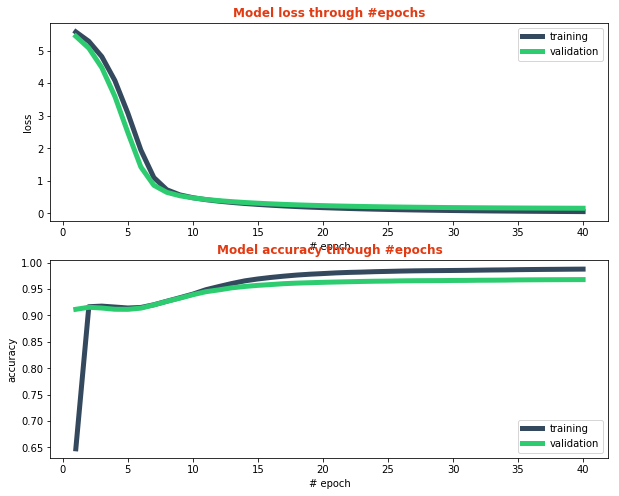

In [23]:
plot_model_performance(
    train_loss=model_hist.history.get('loss', []),
    train_acc=model_hist.history.get('acc', []),
    train_val_loss=model_hist.history.get('val_loss', []),
    train_val_acc=model_hist.history.get('val_acc', [])
)

## Función que Permite convertir Indices en Tags

In [24]:
def logits_to_tokens(sequences, index):
    token_sequences = []
    for categorical_sequence in sequences:
        token_sequence = []
        for categorical in categorical_sequence:
            token_sequence.append(index[np.argmax(categorical)])
 
        token_sequences.append(token_sequence)
 
    return token_sequences

## Hacemos la prediccion sobre el conjunto de pruebas. De la distribución probabilítica a etiquetas.

In [25]:
import pandas as pd

prediction = model.predict(test_sentences_X)
log_tokens = logits_to_tokens(prediction, {i: t for t, i in tag2index.items()})

print(log_tokens[0])

[u'da0ms0', u'ncms000', u'aq0ms0', u'vmis3s0', u'da0ms0', u'W', u'di0ms0', u'aq0ms0', u'ncms000', u'sps00', u'ncfp000', u'aq0fpp', u'sps00', u'vmn0000', u'da0ms0', u'ncms000', u'aq0ms0', u'Fc', u'pr0cn000', u'vmip3s0', u'di0fs0', u'ncfs000', u'sps00', u'sps00', u'da0ms0', u'Z', u'cc', u'da0ms0', u'Zp', u'sps00', u'da0mp0', u'np0000p', u'sps00', u'da0mp0', u'ncmp000', u'aq0mp0', u'Fp', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', 

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

results = pd.DataFrame(columns=['Expected', 'Predicted'])
k = 0
for i, lista_etiquetas_oracion in enumerate(test_tags):
    for j, etiquetas in enumerate(lista_etiquetas_oracion):
        k = k + 1
        results.loc[k, 'Expected'] = etiquetas
        results.loc[k, 'Predicted'] = log_tokens[i][j]

print(results)


print('\nclassification_report:\n', classification_report(results['Expected'], results['Predicted']))

       Expected Predicted
1        da0ms0    da0ms0
2       ncms000   ncms000
3        aq0ms0    aq0ms0
4       vmis3s0   vmis3s0
5        da0ms0    da0ms0
6             W         W
7        di0ms0    di0ms0
8        aq0ms0    aq0ms0
9       nccs000   ncms000
10        sps00     sps00
11      ncfp000   ncfp000
12       aq0fpp    aq0fpp
13        sps00     sps00
14      vmn0000   vmn0000
15       da0ms0    da0ms0
16      ncms000   ncms000
17       aq0ms0    aq0ms0
18           Fc        Fc
19     pr0cn000  pr0cn000
20      vmip3s0   vmip3s0
21       di0fs0    di0fs0
22      ncfs000   ncfs000
23        sps00     sps00
24        sps00     sps00
25       da0ms0    da0ms0
26            Z         Z
27           cc        cc
28       da0ms0    da0ms0
29           Zp        Zp
30        sps00     sps00
...         ...       ...
38573   ncfp000   np0000p
38574     sps00     sps00
38575    da0fs0    da0fs0
38576   ncfs000   ncms000
38577     spcms     spcms
38578   ncms000   ncms000
38579       

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


('\nclassification_report:\n', u'              precision    recall  f1-score   support\n\n       -PAD-       0.00      0.00      0.00         0\n         Faa       0.00      0.00      0.00         7\n         Fat       0.00      0.00      0.00        10\n          Fc       1.00      1.00      1.00      2270\n          Fd       1.00      1.00      1.00        97\n          Fe       1.00      1.00      1.00       597\n          Fg       1.00      1.00      1.00       235\n          Fh       0.00      0.00      0.00         1\n         Fia       1.00      1.00      1.00        12\n         Fit       1.00      1.00      1.00        29\n          Fp       1.00      1.00      1.00      1181\n         Fpa       1.00      1.00      1.00       130\n         Fpt       1.00      1.00      1.00       130\n          Fs       1.00      1.00      1.00         2\n          Fx       1.00      1.00      1.00        32\n          Fz       0.00      0.00      0.00         6\n           W       0.96      0

## PARTE 4 - Testing

### Creamos un pequeño Ejemplo

In [27]:
test_samples = [
    "Correr es importante para mi .".split(),
    "El hombre bajo corre bajo el puente con bajo índice de adrenalina .".split()
]
print(test_samples)

[['Correr', 'es', 'importante', 'para', 'mi', '.'], ['El', 'hombre', 'bajo', 'corre', 'bajo', 'el', 'puente', 'con', 'bajo', '\xc3\xadndice', 'de', 'adrenalina', '.']]


### Convertimos el texto en Una entrada para el Modelo y se generan los dos vecores de enteros de las dos oraciones

In [28]:
test_samples_X = []
for s in test_samples:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
    test_samples_X.append(s_int)

test_samples_X = pad_sequences(test_samples_X, maxlen=MAX_LENGTH, padding='post')
print(test_samples_X)
print(test_samples_X.shape)

[[20710  8171  1236 16282 15736   238     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [ 9243 15801 12429  6737 12429  9243 10473  7889 12429     1  7850     1
    2

### Se Ejecuta la predicion con la Entrada del modelo entrenado y el modelo de la red neuronal predice un matriz de 149 X 291 por cada oración. El shape de a predicción es (2, 149,291)

In [29]:
predictions = model.predict(test_samples_X)
print(predictions, predictions.shape)

(array([[[4.20607073e-04, 1.36314775e-04, 1.71082560e-04, ...,
         9.46361339e-04, 1.35467344e-04, 1.13132592e-04],
        [1.43469060e-05, 2.37939375e-07, 2.29431095e-07, ...,
         1.18754666e-04, 4.91533171e-07, 2.33822618e-07],
        [3.75424406e-06, 2.18043581e-07, 3.03436309e-07, ...,
         1.33149209e-04, 4.36513034e-07, 2.44028911e-07],
        ...,
        [9.96983826e-01, 8.08240566e-06, 8.77049024e-06, ...,
         7.87543740e-06, 8.57249597e-06, 7.29903968e-06],
        [9.96983826e-01, 8.08240566e-06, 8.77049024e-06, ...,
         7.87543740e-06, 8.57249597e-06, 7.29903968e-06],
        [9.96983826e-01, 8.08240566e-06, 8.77049024e-06, ...,
         7.87543740e-06, 8.57249597e-06, 7.29903968e-06]],

       [[3.11033887e-06, 1.95744164e-07, 7.37726111e-07, ...,
         3.54704571e-05, 2.11314315e-07, 2.80571925e-07],
        [5.41056179e-05, 2.61777291e-06, 2.99393901e-06, ...,
         2.15468550e-04, 2.66952634e-06, 2.67140558e-06],
        [1.01943302e-03,

### Conversion de la Salida del Modelo a un lista de Indices de Tags

In [30]:
log_tokens = logits_to_tokens(predictions, {i: t for t, i in tag2index.items()})
print(log_tokens)

[[u'vmn0000', u'vsip3s0', u'aq0cs0', u'sps00', u'dp1css', u'Fp', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-',

### Presentación de los Resultados

In [31]:
#!pip install tabulate
from tabulate import tabulate

heads1 = test_samples[0]
body1 = [log_tokens[0][:len(test_samples[0])]]

heads2 = test_samples[1]
body2 = [log_tokens[1][:len(test_samples[1])]]

print(tabulate(body1, headers=heads1))

print ("\n")

print(goodPrint(heads2))
print(body2)


## postagging Freeling 4.1

## El      hombre   bajo     corre    bajo  el      puente   con  bajo  índice   de  adrenalina  .
## DA0MS0  NCMS000  AQ0MS00  VMIP3S0  SP    DA0MS0  NCMS000  SP   SP    NCMS000  SP  NCFS000     Fp


## pos tagger Stanford NLP

## El      hombre   bajo     corre    bajo  el      puente   con    bajo   índice  de    adrenalina  .
## da0000  nc0s000  aq0000   vmip000  sp000 da0000  nc0s000  sp000  aq0000 nc0s000 sp000 nc0s000     fp

Correr    es       importante    para    mi      .
--------  -------  ------------  ------  ------  ---
vmn0000   vsip3s0  aq0cs0        sps00   dp1css  Fp


El hombre bajo corre bajo el puente con bajo índice de adrenalina . 
[[u'da0ms0', u'ncms000', u'sps00', u'vmip3s0', u'sps00', u'da0ms0', u'ncms000', u'sps00', u'sps00', u'ncms000', u'sps00', u'ncms000', u'Fp']]
